# Library 

In [58]:
import arcpy
import numpy as np
import os
from arcgis.gis import GIS
from arcgis.geometry import Geometry
import matplotlib.pyplot as plt
from arcgis.geometry import Point
import pandas as pd

pd.options.display.max_columns = None #if you have a long dataframe you can see all of it 

In [5]:
arcpy.env.workspace= r'C:\Users\Minoo\Documents\Internship\TaxParcelExploration\TaxParcelTooele.gdb'
arcpy.env.overwriteOutput = True

In [14]:

# show all columns
BoxElder = pd.DataFrame.spatial.from_featureclass(r"C:\Users\Minoo\Documents\Internship\TaxParcelExploration\Work\BoxElder\housing_unit_inventory_2022_20240725.gdb\housing_unit_inventory_box_elder_2020")  #reads the spatial data
 

In [16]:
BoxElder.head()


,OBJECTID,UNIT_ID,TYPE,SUBTYPE,UNIT_COUNT,ACRES,APX_BLT_YR,DUA,IS_OUG,TOT_BD_FT2,TOT_VALUE,CITY,COUNTY,SUBCOUNTY,VINTAGE,BLT_DECADE,SHAPE
0,1,<NA>,single_family,single_family,1,0.215817,1982,4.633554,0,937,40002.806583,Brigham City,Box Elder,Box Elder (WFRC),2020,<NA>,"{""rings"": [[[-12469084.5998, 5086463.431000002..."
1,2,<NA>,single_family,single_family,1,0.197022,1975,5.075581,0,906,40002.618578,Brigham City,Box Elder,Box Elder (WFRC),2020,<NA>,"{""rings"": [[[-12469984.0386, 5090310.146600001..."
2,3,<NA>,single_family,single_family,1,0.231193,1957,4.325389,0,1363,40002.653614,Brigham City,Box Elder,Box Elder (WFRC),2020,<NA>,"{""rings"": [[[-12467734.5439, 5088583.539300002..."
3,4,<NA>,single_family,single_family,1,0.24554,1908,4.072662,0,1357,65004.943783,Perry,Box Elder,Box Elder (WFRC),2020,<NA>,"{""rings"": [[[-12471364.313000001, 5081462.0619..."
4,5,<NA>,single_family,single_family,1,0.341682,1997,2.9267,0,2595,64989.700538,Perry,Box Elder,Box Elder (WFRC),2020,<NA>,"{""rings"": [[[-12470304.575, 5081584.3015], [-1..."


In [34]:
BoxElder.dtypes

OBJECTID                      Int64
UNIT_ID                       Int64
TYPE                 string[python]
SUBTYPE              string[python]
UNIT_COUNT                    Int64
ACRES                       Float64
APX_BLT_YR                    Int64
DUA                         Float64
IS_OUG                        Int64
TOT_BD_FT2                    Int64
TOT_VALUE                   Float64
CITY                 string[python]
COUNTY               string[python]
SUBCOUNTY            string[python]
VINTAGE                       Int64
BLT_DECADE                    Int32
SHAPE                      geometry
BuiltYearCategory           float64
dtype: object

In [18]:
BoxElder.tail()

,OBJECTID,UNIT_ID,TYPE,SUBTYPE,UNIT_COUNT,ACRES,APX_BLT_YR,DUA,IS_OUG,TOT_BD_FT2,TOT_VALUE,CITY,COUNTY,SUBCOUNTY,VINTAGE,BLT_DECADE,SHAPE
8635,8729,<NA>,multi_family,apartment,16,0.777479,1980,20.579328,1,3240,1056000.0,Brigham City,Box Elder,Box Elder (WFRC),2020,<NA>,"{""rings"": [[[-12469659.5915, 5090219.646899998..."
8636,8730,<NA>,multi_family,apartment,26,1.241981,1984,20.934295,1,18597,1023670.0,Brigham City,Box Elder,Box Elder (WFRC),2020,<NA>,"{""rings"": [[[-12469485.149799999, 5090349.8760..."
8637,8731,<NA>,multi_family,apartment,15,0.610918,2010,24.553207,1,15883,3776662.0,Brigham City,Box Elder,Box Elder (WFRC),2020,<NA>,"{""rings"": [[[-12470093.5709, 5090622.515199996..."
8638,8732,<NA>,multi_family,townhome,8,3.306092,2009,2.419775,1,13472,4018576.0,Brigham City,Box Elder,Box Elder (WFRC),2020,<NA>,"{""rings"": [[[-12469186.407499999, 5091349.7871..."
8639,8733,<NA>,single_family,single_family,1,0.072245,<NA>,<NA>,0,1032,244256.0,Brigham City,Box Elder,Box Elder (WFRC),2020,<NA>,"{""rings"": [[[-12468872.7196, 5085507.718599997..."


In [19]:
BoxElder.shape #number of rows and columns

(8640, 17)

In [30]:
BoxElder.columns

Index(['OBJECTID', 'UNIT_ID', 'TYPE', 'SUBTYPE', 'UNIT_COUNT', 'ACRES',
       'APX_BLT_YR', 'DUA', 'IS_OUG', 'TOT_BD_FT2', 'TOT_VALUE', 'CITY',
       'COUNTY', 'SUBCOUNTY', 'VINTAGE', 'BLT_DECADE', 'SHAPE',
       'BuiltYearCategory'],
      dtype='object')

In [21]:
BoxElder["SUBTYPE"].value_counts()

SUBTYPE
single_family       8490
apartment             63
duplex                51
townhome              21
mobile_home_park      10
condo                  5
Name: count, dtype: Int64

In [24]:
BoxElder["APX_BLT_YR"].value_counts()  #count of the records 

APX_BLT_YR
1959    439
1961    318
1960    306
1962    288
9999    261
       ... 
1877      1
1881      1
1867      1
1876      1
2016      1
Name: count, Length: 146, dtype: Int64

In [28]:
BoxElder["BuiltYearCategory"] = np.nan


In [49]:
BoxElder.head()

,OBJECTID,UNIT_ID,TYPE,SUBTYPE,UNIT_COUNT,ACRES,APX_BLT_YR,DUA,IS_OUG,TOT_BD_FT2,TOT_VALUE,CITY,COUNTY,SUBCOUNTY,VINTAGE,BLT_DECADE,SHAPE,BuiltYearCategory
0,1,<NA>,single_family,single_family,1,0.215817,1982,4.633554,0,937,40002.806583,Brigham City,Box Elder,Box Elder (WFRC),2020,<NA>,"{""rings"": [[[-12469084.5998, 5086463.431000002...",1890-2000
1,2,<NA>,single_family,single_family,1,0.197022,1975,5.075581,0,906,40002.618578,Brigham City,Box Elder,Box Elder (WFRC),2020,<NA>,"{""rings"": [[[-12469984.0386, 5090310.146600001...",1890-2000
2,3,<NA>,single_family,single_family,1,0.231193,1957,4.325389,0,1363,40002.653614,Brigham City,Box Elder,Box Elder (WFRC),2020,<NA>,"{""rings"": [[[-12467734.5439, 5088583.539300002...",1890-2000
3,4,<NA>,single_family,single_family,1,0.24554,1908,4.072662,0,1357,65004.943783,Perry,Box Elder,Box Elder (WFRC),2020,<NA>,"{""rings"": [[[-12471364.313000001, 5081462.0619...",1890-2000
4,5,<NA>,single_family,single_family,1,0.341682,1997,2.9267,0,2595,64989.700538,Perry,Box Elder,Box Elder (WFRC),2020,<NA>,"{""rings"": [[[-12470304.575, 5081584.3015], [-1...",1890-2000


In [43]:
#define the categories 
#regular python function 
#pandas 

BoxElder.loc[(BoxElder["APX_BLT_YR"] >= 1870) & (BoxElder["APX_BLT_YR"] < 1890),"BuiltYearCategory"] = "1870-1890" 
BoxElder.loc[(BoxElder["APX_BLT_YR"] >= 1890) & (BoxElder["APX_BLT_YR"] < 2000),"BuiltYearCategory"] = "1890-2000" 
BoxElder.loc[(BoxElder["APX_BLT_YR"] >= 2000) & (BoxElder["APX_BLT_YR"] < 2010),"BuiltYearCategory"] = "2000-2010" #set a condition using a table and copy the value if the condition is met 
BoxElder.loc[(BoxElder["APX_BLT_YR"] >= 2010) & (BoxElder["APX_BLT_YR"] < 2020),"BuiltYearCategory"] = "2010-2020"
BoxElder.loc[(BoxElder["APX_BLT_YR"] >= 2020) & (BoxElder["APX_BLT_YR"] < 2023),"BuiltYearCategory"] = "2020-2023"

In [44]:
BoxElder["BuiltYearCategory"].value_counts()  #count of the records 

BuiltYearCategory
1890-2000    5780
2000-2010    1260
2010-2020     360
1870-1890     116
2020-2023       2
Name: count, dtype: int64

In [47]:
BoxElder.groupby("BuiltYearCategory")["UNIT_COUNT"].sum()    #aggregation 

BuiltYearCategory
1870-1890     118
1890-2000    6783
2000-2010    1563
2010-2020     521
2020-2023      50
Name: UNIT_COUNT, dtype: Int64

In [73]:
BoxElderRemovedNA = BoxElder.dropna(subset=["TOT_VALUE", "UNIT_COUNT", "APX_BLT_YR"])

BoxElderRemovedNA.shape

(7803, 18)

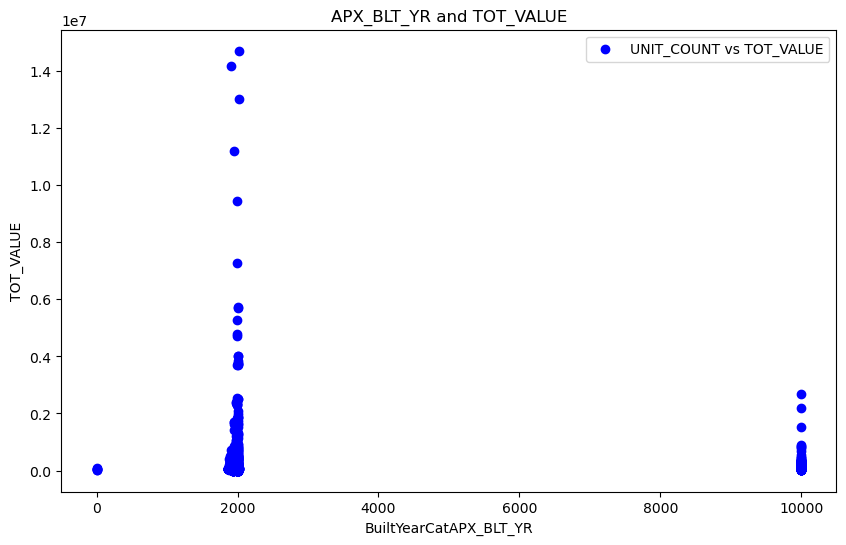

In [80]:
#make a chart 
plt.figure(figsize=(10, 6))  # Set the figure size
plt.scatter(BoxElderRemovedNA['APX_BLT_YR'], BoxElderRemovedNA['TOT_VALUE'], color='blue', label='UNIT_COUNT vs TOT_VALUE')

# Adding titles and labels
plt.title('APX_BLT_YR and TOT_VALUE')
plt.xlabel('BuiltYearCatAPX_BLT_YR')
plt.ylabel('TOT_VALUE')
plt.legend()

# Show the plot
plt.show()